# US county-level data analysis solution

### US county-level sociodemographic and health resource data (2018-2019)

Sociodemographic and health resource data have been collected by county in the United States and we want to find out if there is any **relationship between health resources and sociodemographic data.**

To do this, you need to set a target variable (health-related) to conduct the analysis.




#### Step 3: Build a linear regression model in python

Start solving the problem by implementing a linear regression model and analyze the results. Then, using the same data and default attributes, build a Lasso model and compare the results with the baseline linear regression.

Analyze how $R^2$ evolves when the hyperparameter of the Lasso model changes (you can, for example, start testing from a value of 0.0 and work your way up to a value of 20). Draw these values in a line diagram.

#### Step 4: Optimize the previous linear regression model using python

After training the Lasso model, if the results are not satisfactory, optimize it using one of the techniques seen above.

### 🟠**Step 0: Libraries | Modules | Functions Definition**

In [ ]:
''' 
En este caso definiremos la funcion:
📌📌📌 count_nan_zeros_uniques 📌📌📌
que se encargue de contar los nan (not a number), los zeros y los valores unicos para cada columna de mi df.
'''
def count_nan_zeros_uniques(df): # El argumento que le pasamos a la funcion es un dataframe
    nan_zeros_uniques = {}       # Generamos un diccionario vacio
    for col in df.columns: # Generamos un loop que mire cada columna del dataframe y
        total_count = len(df[col]) # Cuente el nro de observaciones (filas) 
        nan_count = df[col].isna().sum()  # Cuente el nro de nan en cada columna 
        zero_count = (df[col]==0).sum()  # Cuente el nro de zeros en cada columna 
        unique_count = df[col].nunique()  # Cuente el nro de valores unicos que hay en cada columna 
        nan_zeros_uniques[col] = { # Guardo los valores obtenidos, en las siguientes claves del diccionario
            "NaNs" : nan_count,
            "Zeros" : zero_count,
            "Uniques" : unique_count
        }
    return pd.DataFrame.from_dict(nan_zeros_uniques, orient = "index") 
# Convierto ese diccionario en un dataframe. 
# Orient ="Index" indica la forma en la que quiero que despliegue la info.
# .T transpone la data, si eso nos quedara mas comodo.

### **🟠Step 1: Loading the CSV into a python dataset**

>The dataset can be found in this project folder under the name demographic_health_data.csv. You can load it into the code directly from the link:
>
>https://raw.githubusercontent.com/4GeeksAcademy/regularized-linear-regression-project-tutorial/main/demographic_health_data.csv
>
>Or download it and add it by hand in your repository. 

>**⭐CARGAR EL DATASET**

In [1]:
import pandas as pd

# Cargamos el dataset directamente desde la URL
url = "https://raw.githubusercontent.com/4GeeksAcademy/regularized-linear-regression-project-tutorial/main/demographic_health_data.csv"
df_raw = pd.read_csv(url)



>**⭐DATA DICTIONARY**  
>In this dataset you will find a large number of variables, which you will find defined in the [data_dictionary](/workspaces/Project_ML_Linear_Regression_regularized_VL/data_dictionary.xlsx).  
>O puedes verlo mas abajo:

In [2]:
import pandas as pd
from IPython.display import display, HTML

# Leer el archivo Excel
data_dict = pd.read_excel("data_dictionary.xlsx", engine="openpyxl")

# Mostrar toda la tabla en HTML sin cortar nada
html = data_dict.to_html(max_rows=None, max_cols=None)

# Si querés mostrar toda la tabla pero solo para esa celda 
# (sin afectar la configuración global de pandas), 
# podés usar una solución con IPython.display y to_html().

# Estilo CSS para alinear a la izquierda
css = """
<style>
    table { text-align: left !important; }
    th, td { text-align: left !important; padding: 4px; }
</style>
"""

# Mostrar tabla con estilo aplicado
display(HTML(css + html))

,Feature,Unnamed: 1,Unnamed: 2
0,fips,FIPS Code for the County,Column1
1,TOT_POP,Total Population,This data as well as all Age and Race data is pulled from the 2019 Population Estimates of the US Census
2,0-9,Population aged 0-9,All of the other age columns are the same but with varying age
3,0-9 y/o % of total pop,% of the population aged 0-9,NaN
4,10-19',NaN,NaN
5,10-19 y/o % of total pop,NaN,NaN
6,20-29,NaN,NaN
7,20-29 y/o % of total pop,NaN,NaN
8,30-39,NaN,NaN
9,30-39 y/o % of total pop,NaN,NaN


---

### **🟠Step 2: Perform a full EDA (Exploratory Data Analysis)**

>This second step is vital to ensure that we keep the variables that are strictly necessary and eliminate those that are not relevant or do not provide information. Use the example Notebook we worked on and adapt it to this use case.
>
>Be sure to conveniently divide the data set into train and test as we have seen in previous lessons.

---

> **⭐EXPLORING THE DATA**

In [3]:
# Miramos un sample del df
df_raw.sample(10,random_state=2025)

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
120,5023,24965,2423,9.705588,2757,11.043461,2332,9.341078,2541,10.178250,...,2302,14.6,13.3,15.8,2946,3.9,3.6,4.2,790,6
686,17187,17032,2047,12.018553,2427,14.249648,2193,12.875763,1901,11.161343,...,1175,11.5,10.5,12.5,1525,3.2,3.0,3.5,430,6
3098,55105,163129,19981,12.248589,21849,13.393695,19982,12.249202,20353,12.476629,...,8680,10.4,9.5,11.2,13020,3.0,2.8,3.3,3784,4
1512,29063,12630,1193,9.445764,1189,9.414093,1835,14.528899,1942,15.376089,...,984,12.0,11.1,13.0,1258,3.1,2.9,3.3,322,4
2836,51036,6941,536,7.722230,636,9.162945,734,10.574845,670,9.652788,...,600,17.7,16.7,18.7,1043,4.3,4.1,4.6,254,2
4,1009,57840,7095,12.266598,7570,13.087828,6742,11.656293,6884,11.901798,...,4661,13.5,12.6,14.5,6017,3.4,3.2,3.7,1507,2
2559,48077,10456,1041,9.956006,1271,12.155700,998,9.544759,1070,10.233359,...,771,13.5,12.3,14.6,1125,3.5,3.3,3.8,294,4
2727,48413,2895,339,11.709845,490,16.925734,293,10.120898,384,13.264249,...,154,14.2,13.3,15.1,306,3.4,3.2,3.7,74,6
2311,44005,82542,7243,8.774927,9194,11.138572,10520,12.745027,9527,11.542003,...,4598,9.3,8.4,10.4,6410,2.8,2.6,3.1,1922,2
1306,26155,68192,7384,10.828250,8728,12.799155,8258,12.109925,7597,11.140603,...,5037,11.0,10.1,11.9,5936,3.1,2.9,3.4,1682,5


In [4]:
# ==============================================================
# EXPLORAMOS LA ESTRUCTURA DEL DATASET 
# ==============================================================

# Dimensión del dataset
print("Shape:", df_raw.shape)

# Nombres de las columnas
print("Columnas:")
print(df_raw.columns.tolist())

# Información general (tipos de datos, nulos, etc.)
df_raw.info()


Shape: (3140, 108)
Columnas:
['fips', 'TOT_POP', '0-9', '0-9 y/o % of total pop', '19-Oct', '10-19 y/o % of total pop', '20-29', '20-29 y/o % of total pop', '30-39', '30-39 y/o % of total pop', '40-49', '40-49 y/o % of total pop', '50-59', '50-59 y/o % of total pop', '60-69', '60-69 y/o % of total pop', '70-79', '70-79 y/o % of total pop', '80+', '80+ y/o % of total pop', 'White-alone pop', '% White-alone', 'Black-alone pop', '% Black-alone', 'Native American/American Indian-alone pop', '% NA/AI-alone', 'Asian-alone pop', '% Asian-alone', 'Hawaiian/Pacific Islander-alone pop', '% Hawaiian/PI-alone', 'Two or more races pop', '% Two or more races', 'POP_ESTIMATE_2018', 'N_POP_CHG_2018', 'GQ_ESTIMATES_2018', 'R_birth_2018', 'R_death_2018', 'R_NATURAL_INC_2018', 'R_INTERNATIONAL_MIG_2018', 'R_DOMESTIC_MIG_2018', 'R_NET_MIG_2018', 'Less than a high school diploma 2014-18', 'High school diploma only 2014-18', "Some college or associate's degree 2014-18", "Bachelor's degree or higher 2014-18"

In [5]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Columns: 108 entries, fips to Urban_rural_code
dtypes: float64(61), int64(45), object(2)
memory usage: 2.6+ MB


In [6]:
#  🧠 Lo que observamos del dataset
# ==============================================================
#  📊 108 columnas → es bastante grande, lo que hace que la limpieza sea importante.
#  🧮 Tipos de datos:
#      61 columnas tipo float64 (decimales)
#      45 tipo int64
#       2 tipo object (seguramente nombres de condados/estados)
#  🔍 Algunas columnas tienen nombres un poco largos y otros hasta con símbolos 
#     (esto puede traernos problemas más adelante si no los limpiamos).

In [7]:
# ==============================================================
# VERIFICAR VALORES NULOS
# ==============================================================
# Esto te va a mostrar columnas que tienen valores faltantes. En base a eso podemos:
#     Eliminar columnas con muchos nulos
#     Imputar (rellenar) nulos con media/mediana o valor más frecuente
#     Eliminar filas, si tiene sentido
#     Ignoramos algunas si no aportan valor

# Total de valores nulos por columna
nulls = df_raw.isnull().sum()
nulls[nulls > 0].sort_values(ascending=False)


Series([], dtype: int64)

In [8]:
# ==============================================================
# ESTADISTICA DESCRIPTIVA
# ==============================================================
# Podés ver si hay variables con escalas raras, outliers, etc.

# Estadísticas para columnas numéricas
df_raw.describe().T

,count,mean,std,min,25%,50%,75%,max
fips,3140.0,30401.640764,15150.559265,1001.0,18180.500000,29178.000000,45081.50000,5.604500e+04
TOT_POP,3140.0,104189.412420,333583.395432,88.0,10963.250000,25800.500000,67913.00000,1.010552e+07
0-9,3140.0,12740.302866,41807.301846,0.0,1280.500000,3057.000000,8097.00000,1.208253e+06
0-9 y/o % of total pop,3140.0,11.871051,2.124081,0.0,10.594639,11.802727,12.95184,2.546068e+01
19-Oct,3140.0,13367.976752,42284.392134,0.0,1374.500000,3274.000000,8822.25000,1.239139e+06
...,...,...,...,...,...,...,...,...
CKD_prevalence,3140.0,3.446242,0.568059,1.8,3.100000,3.400000,3.80000,6.200000e+00
CKD_Lower 95% CI,3140.0,3.207516,0.527740,1.7,2.900000,3.200000,3.50000,5.800000e+00
CKD_Upper 95% CI,3140.0,3.710478,0.613069,1.9,3.300000,3.700000,4.10000,6.600000e+00
CKD_number,3140.0,2466.234076,7730.422067,3.0,314.750000,718.000000,1776.25000,2.377660e+05


In [9]:
# ==============================================================
# CORRELACIONES CON LA VARIABLE TARGET
# ==============================================================
# Esto te va a devolver las variables más relacionadas con tu variable objetivo.


# Variable Target elegida: 'Heart disease_prevalence'.
# Otras opciones podrian ser: percent_inactive | percent_smokers | percent_obese | preventable_hospital_stays

# Vamos a buscar qué variables están más correlacionadas con 'Heart disease_prevalence'. 
# Esto nos va a ayudar a:
#     Seleccionar features que sean realmente útiles
#     Evitar variables redundantes o poco informativas

# Matriz de correlación (solo variables numéricas)
correlation_matrix = df_raw.corr(numeric_only=True)

# Correlación con el target
target = 'Heart disease_prevalence'
correlations = correlation_matrix[target].drop(target)

# Ordenamos de mayor a menor correlación absoluta
correlations_sorted = correlations.reindex(correlations.abs().sort_values(ascending=False).index)

# Mostramos top 15
correlations_sorted.head(15)

Heart disease_Upper 95% CI    0.997752
Heart disease_Lower 95% CI    0.997441
CKD_Upper 95% CI              0.908082
CKD_prevalence                0.892792
COPD_Upper 95% CI             0.890111
COPD_prevalence               0.886726
COPD_Lower 95% CI             0.877945
CKD_Lower 95% CI              0.874806
diabetes_Upper 95% CI         0.850717
diabetes_prevalence           0.831021
diabetes_Lower 95% CI         0.806340
anycondition_Upper 95% CI     0.792801
anycondition_prevalence       0.784088
anycondition_Lower 95% CI     0.771876
CI90LBINC_2018               -0.737557
Name: Heart disease_prevalence, dtype: float64

In [10]:
# 🧠 Interpretación del output:
# ====================================================================================
# 🔝 Variables más correlacionadas con Heart disease_prevalence:
# Muchos de los valores más correlacionados son estimaciones relacionadas o derivadas 
# directamente del target, como:
#     Heart disease_Upper 95% CI y Heart disease_Lower 95% CI 
#           → ❌ No las uses como input, porque son prácticamente el mismo valor que el target.
#     Otras condiciones de salud como CKD_prevalence, COPD_prevalence, diabetes_prevalence, etc. 
#           → ✅ Podrían ser buenas features si querés ver cómo distintas condiciones afectan 
#             a la prevalencia de enfermedad cardíaca.
#     CI90LBINC_2018 (percentil inferior del ingreso familiar) 
#           → ❗ interesante ver que está negativamente correlacionado 
#           → a menor ingreso, mayor prevalencia de enfermedad cardíaca.

In [11]:
# 🔥 Features sugeridas (Seleccionar columnas para el modelo)
# ====================================================================================
#    Variables permitidas para usar (no son leaks del target):

selected_features = [
    'CKD_prevalence',
    'COPD_prevalence',
    'diabetes_prevalence',
    'anycondition_prevalence',
    'CI90LBINC_2018',           # Lower bound household income
    'Unemployment_rate_2018',
    'Percent of adults with less than a high school diploma 2014-18',
    'PCTPOVALL_2018',           # % Pobreza
    'Active Primary Care Physicians per 100000 Population 2018 (AAMC)',
    'Total nurse practitioners (2019)'
]

#   Eliminar columnas no útiles
#   Además de ignorar las *_Upper 95% CI y *_Lower 95% CI, también podés descartar:
#     → Identificadores: 'fips', 'STATE_FIPS', 'CNTY_FIPS'
#     → Nombres: 'COUNTY_NAME', 'STATE_NAME'
#     → Columnas duplicadas o redundantes: como 'Total Population' si ya tenés 'TOT_POP', etc.

In [12]:
# ==============================================================
# VISUALIZACIONES: HISTPLOT y HEATMAP (Opcional pero Recomendable)
# ==============================================================

# 📌  Hacelo antes de preparar X e y, porque estas visualizaciones son parte del EDA, y ahí 
#     todavía estás trabajando con el DataFrame completo (df_raw), no sólo con los features 
#     seleccionados.
# 📌 ¿Por qué conviene hacerlo antes?
#     ✓ El histograma del target (Heart disease_prevalence) te ayuda a ver si tiene una distribución
#       normal, sesgada, con outliers, etc.
#         → esto informa tu estrategia de modelado (por ejemplo, si más adelante necesitás 
#           hacer log-transform).
#     ✓ El heatmap de correlaciones es más útil cuando todavía no filtraste columnas. 
#       Te da un panorama global para:
#         → Detectar variables duplicadas o altamente correlacionadas entre sí (multicolinealidad)
#         → Elegir mejores features (evitar usar muchas que digan lo mismo)
# 📌 Entonces el orden sería idealmente así:
#     1. Cargar el dataset
#     2. .info(), .describe(), .isnull() → Diagnóstico general
#     3. Elegir la variable target 
#     4. Visualizaciones (histplot, heatmap)
#     5. Análisis de correlaciones con el target
#     6. Selección de columnas (features)
#     7. Definir X e y

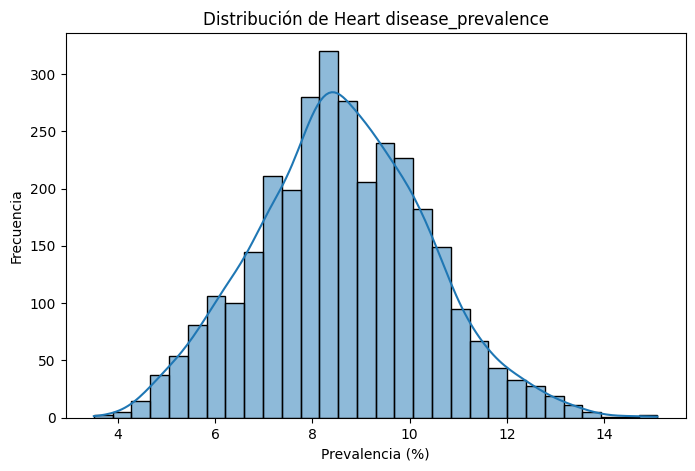

In [13]:
# Histograma del target (Heart disease_prevalence)
# ==============================================================
# Este gráfico te va a mostrar la forma de la distribución de tu variable objetivo.

# ¿Qué deberías observar?
#    ¿Tiene forma de campana (normal)?
#    ¿Está sesgada hacia la izquierda o derecha?
#    ¿Hay outliers?

import matplotlib.pyplot as plt
import seaborn as sns

target = 'Heart disease_prevalence'

plt.figure(figsize=(8, 5))
sns.histplot(df_raw[target], bins=30, kde=True)
plt.title(f'Distribución de {target}')
plt.xlabel('Prevalencia (%)')
plt.ylabel('Frecuencia')
plt.show()


In [14]:
# ◯  Análisis del Histograma
#     -------------------------------------------------------------------------------

# ▶ Lo positivo:
#     Forma aproximadamente normal (distribución gaussiana)
#     Centro en torno al 8% de prevalencia
#     La curva KDE acompaña bien la forma → buena para modelos lineales

# ▶ Cosas a tener en cuenta:
#     Hay una leve asimetría a la derecha (tail hacia valores altos)
#     Algunos valores pueden considerarse outliers suaves (por encima del 13-14%)

# ▶ Conclusión:
#     La variable es apta para usar como target en un modelo de regresión lineal 
#     sin transformaciones, al menos por ahora.

In [15]:
# Heatmap con solo las 10+ variables más correlacionadas con el target
# ========================================================================

# Esto hace zoom solo en lo más importante para no perderse en una sopa de 100 columnas

top_corr = corr_matrix[target].drop(target).abs().sort_values(ascending=False).head(10).index
subset_corr = df_raw[top_corr.tolist() + [target]].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(subset_corr, annot=True, cmap='coolwarm', center=0)
plt.title(f"Correlaciones más altas con {target}")
plt.show()


NameError: name 'corr_matrix' is not defined

In [ ]:
# ◯ Análisis del heatmap de correlaciones altas
#    -------------------------------------------------------------------------------

# ▶  ¿Qué nos dice?
#     Variables con correlación casi perfecta (r > 0.99):
#         Heart disease_Upper 95% CI
#         Heart disease_Lower 95% CI
#         Algunas estimaciones de CKD y COPD (*_Upper, *_Lower)
#     No las uses como features, son derivadas directas del target.

# ▶  Variables redundantes entre sí:
#         CKD_prevalence y CKD_Upper 95% CI → casi la misma info
#         COPD_prevalence y sus CI
#         diabetes_prevalence y diabetes_Upper 95% CI
#     En estos casos, conservá solo la variable de prevalencia principal, 
#     que es más directa y fácil de interpretar.

> **⭐CLEANING**


In [ ]:
total_data = total_data.drop_duplicates().reset_index(drop = True)
total_data.head()

In [ ]:
from sklearn.preprocessing import StandardScaler

data_types = total_data.dtypes
numeric_columns = [c for c in list(data_types[data_types != "object"].index) if c != "Heart disease_number"]

scaler = StandardScaler()
norm_features = scaler.fit_transform(total_data[numeric_columns])

# Create a new DataFrame with the scaled numerical variables
total_data_scal = pd.DataFrame(norm_features, index = total_data.index, columns = numeric_columns)
total_data_scal["Heart disease_number"] = total_data["Heart disease_number"]
total_data_scal.head()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression

X = total_data_scal.drop(columns=["Heart disease_number"])
y = total_data_scal["Heart disease_number"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
train_indices = list(X_train.index)
test_indices = list(X_test.index)

k = int(len(X_train.columns) * 0.3)
selection_model = SelectKBest(score_func = f_regression, k = k)
selection_model.fit(X_train, y_train)
ix = selection_model.get_support()

X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])

X_train_sel.head()

In [ ]:
X_test_sel.head()

In [ ]:
X_train_sel["Heart disease_number"] = list(y_train)
X_test_sel["Heart disease_number"] = list(y_test)

X_train_sel.to_csv("../data/processed/clean_train.csv", index = False)
X_test_sel.to_csv("../data/processed/clean_test.csv", index = False)

In [ ]:
total_data = pd.concat([X_train_sel, X_test_sel])
total_data.head()

In [ ]:
X_test_sel.head()

## Logistic Regression model

In [ ]:
train_data = pd.read_csv("../data/processed/clean_train.csv")
test_data = pd.read_csv("../data/processed/clean_test.csv")

train_data.head()

In [ ]:
X_train = train_data.drop(["Heart disease_number"], axis = 1)
y_train = train_data["Heart disease_number"]
X_test = test_data.drop(["Heart disease_number"], axis = 1)
y_test = test_data["Heart disease_number"]

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

In [ ]:
print(f"Intercep (a): {model.intercept_}")
print(f"Coefficients: {model.coef_}")

In [ ]:
y_pred = model.predict(X_test)
y_pred

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

print(f"MSE: {mean_squared_error(y_test, y_pred)}")
print(f"R2 Score: {r2_score(y_test, y_pred)}")

## Model optimization

In [ ]:
from sklearn.linear_model import Lasso

alpha = 1.0
lasso_model = Lasso(alpha = alpha)

# Training the model
lasso_model.fit(X_train, y_train)

# We evaluate the performance of the model on the test data
score = lasso_model.score(X_test, y_test)
print("Coefficients:", lasso_model.coef_)
print("R2 score:", score)

In [ ]:
from pickle import dump

dump(lasso_model, open("../models/lasso_alpha-1.0.sav", "wb"))